In [5]:
# -*- coding: utf-8 -*-
"""Assignment #5 Stock Price Prediction using RNN/LSTM (인공지능)

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# 주식가격 데이터 불러오기
f=open("Apple.csv","r")    # csv파일 로딩 예시

df = pd.read_csv(f,header=0)

# Set the 'Date' column as the index and sort the data by date
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# csv 데이터에 따라 feature의 이름 다를 수 있음
for i in range(0, len(df)):
  if df.iloc[i,0] == "2016-01-04":
    date = i
  elif df.iloc[i,0] == "2017-01-03":
    end_date = i
seq = df['Close'][date:end_date]
# seq = df['Close'][:len(df)]



Saving Apple.csv to Apple (3).csv


In [6]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=10 # 윈도우 크기
h=1  # 수평선 계수

X,Y=seq2dataset(seq,w,h)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]
    
# Reshape the data for the LSTM network
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))


In [8]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=x_train[0].shape,
               return_sequences=True))
model.add(LSTM(units=50,activation='relu', return_sequences=True))
model.add(LSTM(units=50,activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
model.summary()

hist=model.fit(x_train,y_train,epochs=30,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             12200     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 52,651
Trainable params: 52,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
169/169 - 10s - loss: 5.0470 - mae: 5.0470 - val_loss: 0.5297 - val_mae: 0.5297 - 10s/epoch - 57ms/step
Epoch 2/30
169/169 - 2s - loss: 0.7870 - mae: 0.7870 - val_loss: 0.54

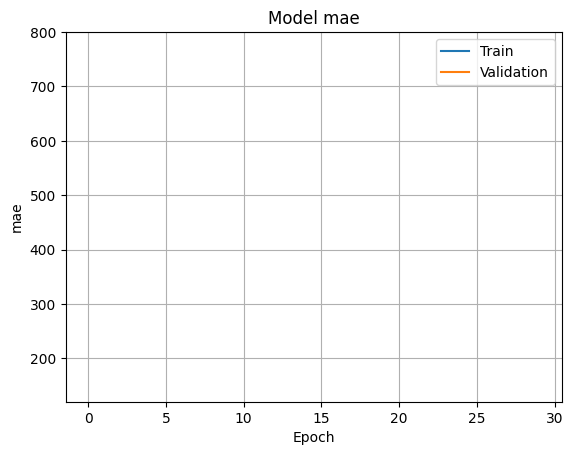

In [9]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()


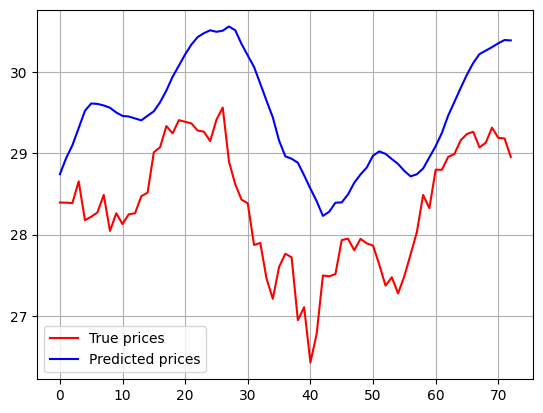

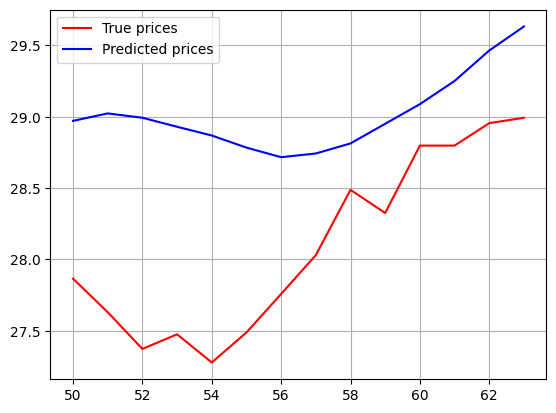

In [10]:
# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()